# Predicting customer satisfaction at Olist - a Brazilian e-commerce platform

## EXPLORATORY ANALYSIS & FEATURE ENGINEERING

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')

Load data

In [2]:
folder_path = str(os.getcwd()) + '/'
df = pd.read_csv(folder_path + 'final_df.csv')

In [3]:
print(df.shape)
print(df.columns)
df.head(3)

(97154, 33)
Index(['order_id', 'product_id', 'seller_id', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'estimated_days_of_delivery', 'actual_days_of_delivery', 'year',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category',
       'review_score', 'review_answer_delay', 'customer_zip_code_prefix',
       'state_code', 'customer_return', 'seller_zip_code_prefix',
       'customer_lat', 'customer_lng', 'seller_lat', 'seller_lng',
       'state_name', 'avg_income', 'state_population', 'late_delivery'],
      dtype='object')


,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,estimated_days_of_delivery,actual_days_of_delivery,...,customer_return,seller_zip_code_prefix,customer_lat,customer_lng,seller_lat,seller_lng,state_name,avg_income,state_population,late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,16.0,7.0,...,0,27277,-21.758076,-41.312633,-22.498183,-44.123614,Rio de Janeiro,1537.216410,16718956,0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,19.0,16.0,...,0,3471,-20.212393,-50.941471,-23.566258,-46.518417,São Paulo,1787.421374,45094866,0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,22.0,8.0,...,0,37564,-19.860439,-44.597972,-22.264094,-46.158564,Minas Gerais,1326.190434,21040662,0


### Review_score

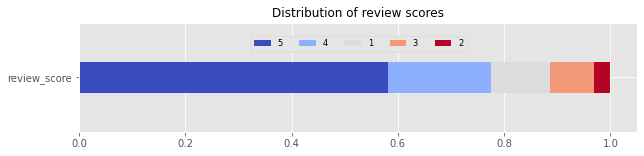

In [4]:
review_score_pct = df['review_score'].value_counts(normalize=True)
review_score_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2,
                                 colormap='coolwarm').legend(loc='upper left', ncol=1)
plt.title('Distribution of review scores', fontsize=12)
plt.legend(ncol=5, bbox_to_anchor=(0.3, 0.7), loc='lower left', fontsize='small')
plt.show()

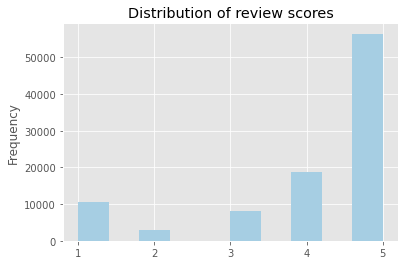

In [5]:
df['review_score'].plot.hist(title='Distribution of review scores',cmap='Paired')
plt.xticks([1,2,3,4,5])
plt.show()

The high scores 4 & 5 account for a total of 78% of the orders, while the low scores 1, 2 & 3 only account for 10%, 3% and 8% respectively.

### Order_status

Order proportion based on order_status:

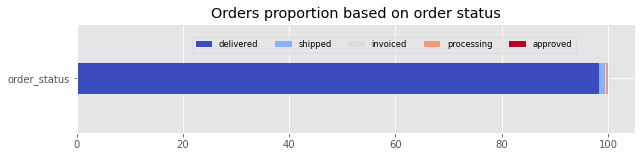

In [6]:
order_status_pct = df.order_status.value_counts(normalize=True)*100
order_status_pct.to_frame().T.plot.barh(stacked=True, figsize=(10,2), width=0.2,
                                 title = 'Orders proportion based on order status',
                                 colormap='coolwarm').legend(loc='upper left', ncol=1)
plt.legend(ncol=5, bbox_to_anchor=(0.2, 0.7), loc='lower left', fontsize='small')
plt.show()

- The distribution of the order_status attribute is highly imbalanced, with 98% of orders were stated ‘delivered’, and the rest divided into ‘shipped’, ‘invoiced’, ‘processing’ and ‘approved’.
- We'll take a closer look at non-delivered order.

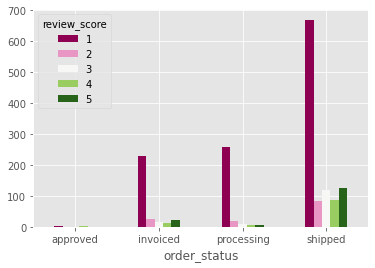

In [7]:
non_delivered_filter = (df['order_status'] != 'delivered')
pd.crosstab(df[non_delivered_filter]['order_status'], 
            df[non_delivered_filter]['review_score']).plot.bar(cmap='PiYG', figsize=(6,4), rot=0)
plt.show()

Across 3 major categories of non-delivered orders, low review scores, especially score 1 is largely dominant.
As the these orders take a very small proportion in the data set and all share this characteristic, we regrouped them into a non-delivered category (valued as 0), versus delivered category (value as 1).

In [8]:
df['delivered'] = np.where(df['order_status']=='delivered', 1, 0)

### Delivery time

In [9]:
df['estimated_delivery_time_error'] = df['actual_days_of_delivery'] - df['estimated_days_of_delivery']

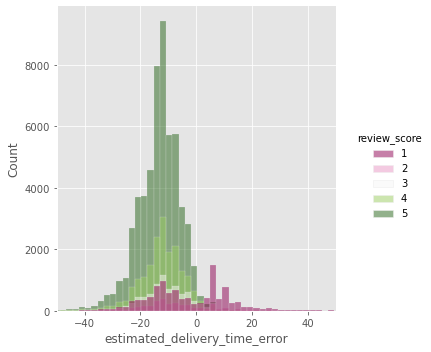

In [10]:
sns.displot(data=df, x="estimated_delivery_time_error", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.show()

We can take a closer look at the unhappy review counts:

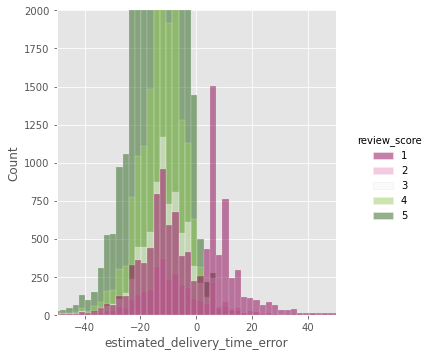

In [11]:
sns.displot(data=df, x="estimated_delivery_time_error", hue="review_score", palette='PiYG', bins=150)
plt.xlim((-50,50))
plt.ylim((0,2000))

plt.show()

When actual delivery time is longer than expected (estimation error > 0), the number of unsatisfied reviews jumps up remarkably.

### Review_answer_delay

In [12]:
df['review_answer_delay'].describe()

count    97154.000000
mean         2.572575
std          9.754643
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        518.000000
Name: review_answer_delay, dtype: float64

The statistics show that 50% of reviews were created in the first day of receiving the surveys. We'll transform this attribute into a categorical variable depending on the delay range.

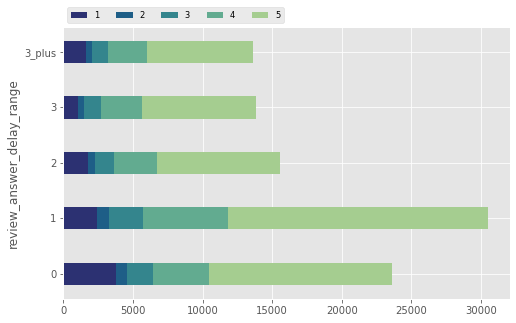

In [13]:
delay_bins = [-1, 0, 1, 2, 3, 518]
delay_labels = ['0', '1', '2', '3', '3_plus']
df['review_answer_delay_range'] = pd.cut(df['review_answer_delay'], delay_bins, labels=delay_labels)

pd.crosstab(df['review_answer_delay_range'],
            df['review_score']).plot.barh(figsize=(8, 5), stacked=True,
                                                            width=0.4, cmap='crest_r')
plt.legend(ncol=5 ,bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.show()

The graph shows that the unhappy customers tend to give feedback early within 1 day of receiving the survey. We'll encode this feature to binary to see if it can help detect low review scores.

In [14]:
delay_dummies = pd.get_dummies(df['review_answer_delay_range'], prefix='review_delay_range')
df = pd.concat([df, delay_dummies], axis=1)

### Product categories

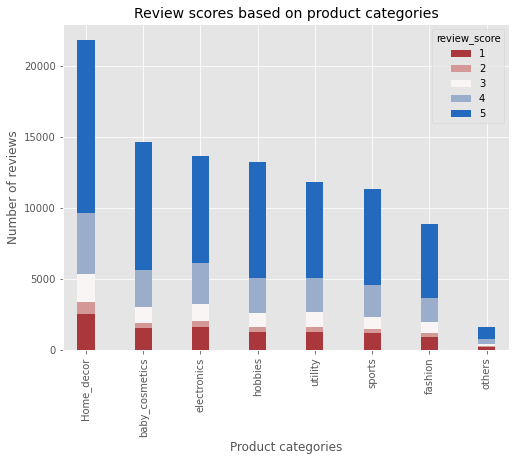

In [15]:
cat_review_score = pd.crosstab(df['product_category'], df['review_score'], margins=True, margins_name='total_counts')
cat_review_score.drop('total_counts', axis=0, inplace=True)
cat_review_score.sort_values(by='total_counts', ascending=False, inplace=True)
cat_review_score.drop('total_counts', axis=1)[:50].plot(kind='bar', stacked=True,
                                                        figsize=(8,6), width=0.3,cmap='vlag_r')
plt.title('Review scores based on product categories', fontsize=14)
plt.xlabel('Product categories')
plt.ylabel('Number of reviews')
plt.show()

Create dummy variables for each group.

In [16]:
cat_dummies = pd.get_dummies(df['product_category'])
df = pd.concat([df, cat_dummies], axis=1)
df = df.drop('product_category', axis=1)

As popular categories also have higher counts of low review scores, we'll create features to capture the product categories with high sales volume.

### Popular sellers

In [17]:
sales_by_seller = df['seller_id'].value_counts().reset_index()
sales_by_seller.columns = ['seller_id', 'sales_volume']
print(sales_by_seller.shape)
sales_by_seller.head(3)

(3042, 2)


,seller_id,sales_volume
0,6560211a19b47992c3666cc44a7e94c0,1821
1,4a3ca9315b744ce9f8e9374361493884,1730
2,cc419e0650a3c5ba77189a1882b7556a,1630


<AxesSubplot:ylabel='Frequency'>

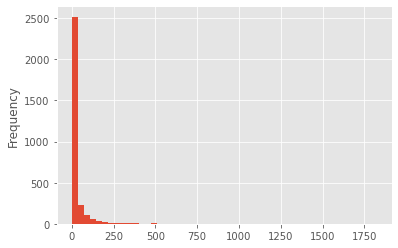

In [18]:
sales_by_seller.sales_volume.sort_values().plot.hist(bins=50) #, xlim=(0,250))

In [19]:
# capture best seller list
sales_by_seller['popular_seller'] = (sales_by_seller['sales_volume'] >= 100).astype(int)

In [20]:
df = df.merge(sales_by_seller[['seller_id', 'popular_seller']], on='seller_id', how='left')

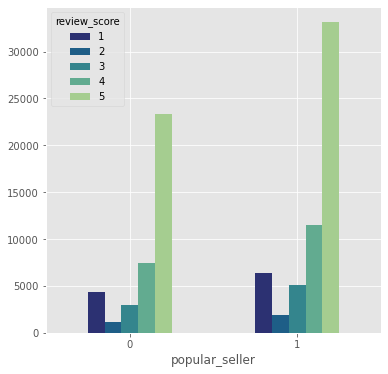

In [21]:
pd.crosstab(df['popular_seller'], df['review_score']).plot.bar(rot=0, figsize=(6,6),
                                                               cmap=sns.color_palette('crest_r', as_cmap=True))
plt.show()

### Time of purchase

In [22]:
df['purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day

Review scores based on year & month of the year.

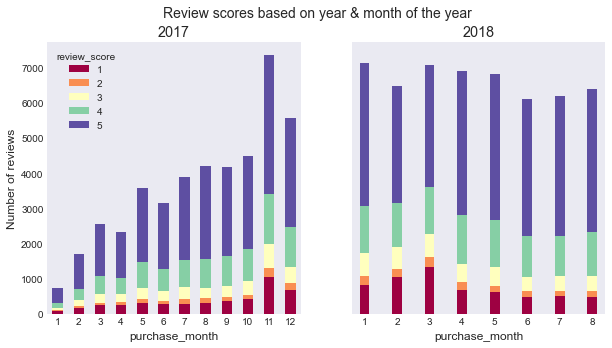

In [23]:
# skip the year 2016 in which there are very small number of observations
filt_2017 = (df['year'] == 2017)
filt_2018 = (df['year'] == 2018)
style.use('seaborn-dark')
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
pd.crosstab(df[filt_2017]['purchase_month'], df[filt_2017]['review_score']).plot(ax=axes[0], kind='bar', width=0.5,
                                                                                 stacked=True, cmap='Spectral',
                                                                                 title='2017', rot=0)
pd.crosstab(df[filt_2018]['purchase_month'], df[filt_2018]['review_score']).plot(ax=axes[1], kind='bar',width=0.3,
                                                                                 stacked=True, cmap='Spectral',
                                                                                 title='2018', rot=0, legend=False)
plt.suptitle('Review scores based on year & month of the year', fontsize=14)
axes[0].set_ylabel('Number of reviews')
plt.show()

The sales volumes varied throughout the months and years.

### Social-economic factors

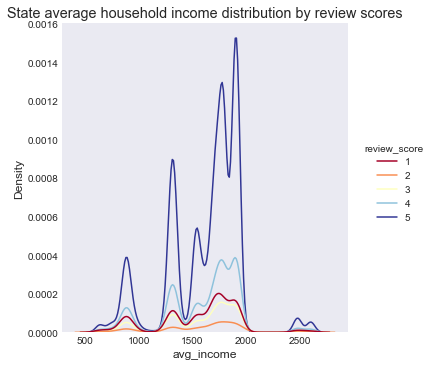

In [24]:
sns.displot(data=df, x="avg_income", hue="review_score", kind="kde", palette='RdYlBu')
plt.title('State average household income distribution by review scores')
plt.show()

Customer satisfaction differs amongst different groups of average income.

In [25]:
# group by state to get average income, average population & total purchases
total_purchase_by_state = df.groupby(['state_code','state_name'], as_index=False).agg(avg_income=('avg_income', 'mean'),
                                                          state_population=('state_population', 'mean'),
                                                          total_purchase=('price', 'sum')) 
# sort by total_purchase
total_purchase_by_state.sort_values(by='total_purchase', ascending=False, inplace=True)

In [26]:
total_purchase_by_state.head()

,state_code,state_name,avg_income,state_population,total_purchase
25,SP,São Paulo,1855.932198,4.534949e+07,4.671364e+06
18,RJ,Rio de Janeiro,1626.033752,1.694558e+07,1.635287e+06
10,MG,Minas Gerais,1313.385484,2.107697e+07,1.438009e+06
22,RS,Rio Grande do Sul,1727.244927,1.132619e+07,6.726468e+05
17,PR,Paraná,1572.098789,1.133598e+07,6.092497e+05


Relationship between state population, average income & total purchase

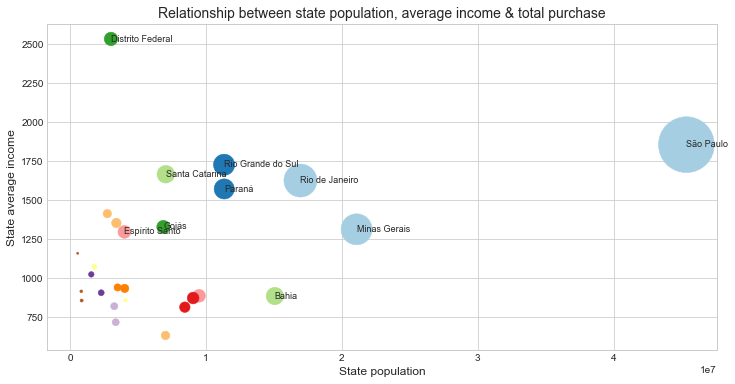

In [27]:
style.use('seaborn-whitegrid')
colors = np.arange(1,28,1)
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(data=total_purchase_by_state, x='state_population', y='avg_income',
           s=total_purchase_by_state['total_purchase']/1500, c=colors, cmap='Paired') #brg, Spectral_r
plt.xlabel('State population')
plt.ylabel('State average income')
plt.title('Relationship between state population, average income & total purchase', fontsize=14)
# plot names of 10 states with highest total purchases
offset = 10
top_purchase = total_purchase_by_state[:10]
for x, y, s, state in zip(top_purchase['state_population'], top_purchase['avg_income'],
                          top_purchase['total_purchase'], top_purchase['state_name']):
    ax.text(x+offset, y, state, va='center', fontsize=9)
plt.show()

The chart shows that states with high average income and high population tend to have high purchasing volume and vice versa.

Sum up the feature transformation before we move on to modeling in the next notebook.

In [28]:
def preprocessing(df):
    df['delivered'] = np.where(df['order_status']=='delivered', 1, 0)
    df['estimated_delivery_time_error'] = df['actual_days_of_delivery'] - df['estimated_days_of_delivery']
    
    # track review answer delay
    delay_bins = [-1, 0, 1, 2, 3, 518]
    delay_labels = ['0', '1', '2', '3', '3_plus']
    df['review_answer_delay_range'] = pd.cut(df['review_answer_delay'], delay_bins, labels=delay_labels)
    delay_dummies = pd.get_dummies(df['review_answer_delay_range'], prefix='review_delay_range')
    df = pd.concat([df, delay_dummies], axis=1)
    
    # create dummies for product category
    cat_dummies = pd.get_dummies(df['product_category'])
    df = pd.concat([df, cat_dummies], axis=1)
    
    # get purchase time
    df['purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
    df['purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
    
    # drop unwanted columns
    to_drop = ['product_category', 'review_answer_delay_range', 'order_id', 'seller_id',
               'customer_id', 'product_id', 'state_code', 'order_status',
               'order_purchase_timestamp', 'year', 'review_answer_delay',
               'review_answer_delay_range', 'state_name']
    df = df.drop(columns=to_drop, axis=1)
    
    return df